In [3]:
import requests
import json
import pandas as pd
import time

In [8]:
LEAGUE_ID = 85647
PAGE_ID = 1
GW = 14
PLAYER_ID = 1802621
PAGE_COUNT = 1

gw_url = "https://fantasy.premierleague.com/api/event/{}/live/"  # stands for gameweek
fixture_url = "https://fantasy.premierleague.com/api/fixtures/"  # FIXTURE_ID
transfer_url = "https://fantasy.premierleague.com/api/entry/{}/transfers/"  # player_id
history_url = "https://fantasy.premierleague.com/api/entry/{}/history/"  # {} = PLAYER_ID
h2h_league = "https://fantasy.premierleague.com/api/leagues-h2h-matches/league/{}/"  # LEAGUE_ID

# You can access members of your leagues with this code
league_url = "https://fantasy.premierleague.com/api/leagues-classic/{}/standings/?page_standings={}"
# ?page_new_entries=1&page_standings={page_id}&phase=2"

# with the main api, You can access players, teams, fixtures, phases of the game. Use json.keys() to Dictionary of elements
FPL_url = "https://fantasy.premierleague.com/api/bootstrap-static/"

# Access Entry picks with the team_id
fpl_player = (
    "https://fantasy.premierleague.com/api/entry/{}/event/{}/picks/"  # corresponds to player_id and gameweek
)

# r = requests.get("")
# json = r.json()
# json.keys()

In [7]:
v = requests.get(fpl_player.format(98120, 1))  # player_id, gameweek
v.json()

{'active_chip': None,
 'automatic_subs': [],
 'entry_history': {'event': 1,
  'points': 51,
  'total_points': 51,
  'rank': 6785752,
  'rank_sort': 6786196,
  'overall_rank': 6785753,
  'bank': 0,
  'value': 1000,
  'event_transfers': 0,
  'event_transfers_cost': 0,
  'points_on_bench': 8},
 'picks': [{'element': 17,
   'position': 1,
   'multiplier': 1,
   'is_captain': False,
   'is_vice_captain': False},
  {'element': 131,
   'position': 2,
   'multiplier': 1,
   'is_captain': False,
   'is_vice_captain': False},
  {'element': 36,
   'position': 3,
   'multiplier': 1,
   'is_captain': False,
   'is_vice_captain': False},
  {'element': 398,
   'position': 4,
   'multiplier': 1,
   'is_captain': False,
   'is_vice_captain': False},
  {'element': 14,
   'position': 5,
   'multiplier': 1,
   'is_captain': False,
   'is_vice_captain': False},
  {'element': 19,
   'position': 6,
   'multiplier': 1,
   'is_captain': False,
   'is_vice_captain': False},
  {'element': 349,
   'position': 7,


In [10]:
def get_participant_entry(entry_id, gw):
    r = requests.get(fpl_player.format(entry_id, gw))
    # Logs
    print("Retrieving results, participant {} for event = {}".format(entry_id, gw))

    obj = r.json()
    team_list = {"auto_subs": {"in": [], "out": []}, "players": [], "bench": []}

    if r.status_code == 200:
        team_list["gw"] = str(gw)
        team_list["entry"] = str(entry_id)
        team_list["active_chip"] = obj["active_chip"]

        team_list["points_on_bench"] = str(obj["entry_history"]["points_on_bench"])
        team_list["total_points"] = str(obj["entry_history"]["points"])
        team_list["points_on_bench"] = str(obj["entry_history"]["points_on_bench"])
        team_list["event_transfers_cost"] = str(obj["entry_history"]["event_transfers_cost"])

        if obj["automatic_subs"]:
            for item in obj["automatic_subs"]:
                team_list["auto_subs"]["in"].append(str(item["element_in"]))
                team_list["auto_subs"]["out"].append(str(item["element_out"]))

        for item in obj["picks"]:
            if item["is_captain"]:
                team_list["captain"] = str(int(item["element"]))
                team_list["players"].append(str(item["element"]))
            elif item["is_vice_captain"]:
                team_list["vice_captain"] = str(int(item["element"]))
                team_list["players"].append(str(item["element"]))
            else:
                if item["multiplier"] != 0:
                    team_list["players"].append(str(item["element"]))
                    team_list["bench"].append(str(item["element"]))
    return team_list

In [11]:
all_gw_entries = [get_participant_entry(98120, i) for i in range(GW)]
all_gw_entries

Retrieving results, participant 98120 for event = 0
Retrieving results, participant 98120 for event = 1
Retrieving results, participant 98120 for event = 2
Retrieving results, participant 98120 for event = 3
Retrieving results, participant 98120 for event = 4
Retrieving results, participant 98120 for event = 5
Retrieving results, participant 98120 for event = 6
Retrieving results, participant 98120 for event = 7
Retrieving results, participant 98120 for event = 8
Retrieving results, participant 98120 for event = 9
Retrieving results, participant 98120 for event = 10
Retrieving results, participant 98120 for event = 11
Retrieving results, participant 98120 for event = 12
Retrieving results, participant 98120 for event = 13


[{'auto_subs': {'in': [], 'out': []}, 'players': [], 'bench': []},
 {'auto_subs': {'in': [], 'out': []},
  'players': ['17',
   '131',
   '36',
   '398',
   '14',
   '19',
   '349',
   '226',
   '373',
   '355',
   '343'],
  'bench': '343',
  'gw': '1',
  'entry': '98120',
  'active_chip': None,
  'points_on_bench': '8',
  'total_points': '51',
  'event_transfers_cost': '0',
  'captain': '349',
  'vice_captain': '373'},
 {'auto_subs': {'in': [], 'out': []},
  'players': ['524',
   '131',
   '36',
   '398',
   '14',
   '19',
   '504',
   '226',
   '373',
   '355',
   '343'],
  'bench': '343',
  'gw': '2',
  'entry': '98120',
  'active_chip': None,
  'points_on_bench': '11',
  'total_points': '58',
  'event_transfers_cost': '0',
  'vice_captain': '504',
  'captain': '373'},
 {'auto_subs': {'in': [], 'out': []},
  'players': ['17',
   '131',
   '36',
   '103',
   '14',
   '19',
   '504',
   '353',
   '373',
   '355',
   '343'],
  'bench': '343',
  'gw': '3',
  'entry': '98120',
  'active_

In [45]:
# Most occuring across segments
import operator


def frequency_counter(metric: dict, key="players"):
    assert key in metric.keys()
    count = {}
    for i in metric[key]:
        count[i] = count.get(i, 0) + 1

    count = sorted(count.items(), key=operator.itemgetter(1), reverse=True)

    return {key: count}


# combine list of dictionaries
grand_dict = {key: [] for key in all_gw_entries[1].keys()}

print(all_gw_entries[1].keys())


for item in all_gw_entries[1:]:
    for key in item.keys():
        if isinstance(item[key], list):
            grand_dict[key].extend(item[key])
        elif isinstance(item[key], str):
            grand_dict[key].append(item[key])
        else:
            pass

dict_keys(['auto_subs', 'players', 'bench', 'gw', 'entry', 'active_chip', 'points_on_bench', 'total_points', 'event_transfers_cost', 'captain', 'vice_captain'])


In [323]:
all_df = pd.DataFrame(all_gw_entries[1:])
all_df

,auto_subs,players,bench,gw,entry,active_chip,points_on_bench,total_points,event_transfers_cost,captain,vice_captain
0,"{'in': [], 'out': []}","[17, 131, 36, 398, 14, 19, 349, 226, 373, 355,...",343,1,98120,None,8,51,0,349,373
1,"{'in': [], 'out': []}","[524, 131, 36, 398, 14, 19, 504, 226, 373, 355...",343,2,98120,None,11,58,0,373,504
2,"{'in': [], 'out': []}","[17, 131, 36, 103, 14, 19, 504, 353, 373, 355,...",343,3,98120,None,5,71,0,19,14
3,"{'in': [], 'out': []}","[524, 131, 519, 103, 14, 19, 504, 353, 373, 35...",343,4,98120,None,0,89,0,355,504
4,"{'in': ['524', '103'], 'out': ['17', '131']}","[524, 36, 519, 103, 504, 353, 373, 14, 19, 355...",343,5,98120,None,3,37,0,504,519
5,"{'in': [], 'out': []}","[524, 131, 519, 36, 14, 19, 504, 353, 599, 355...",343,6,98120,None,1,64,0,355,519
6,"{'in': [], 'out': []}","[524, 29, 430, 131, 308, 516, 504, 412, 664, 3...",343,7,98120,wildcard,13,61,0,355,29
7,"{'in': [], 'out': []}","[524, 36, 430, 234, 308, 516, 504, 664, 33, 35...",343,8,98120,None,15,62,0,308,36
8,"{'in': [], 'out': []}","[28, 36, 430, 29, 308, 516, 504, 664, 33, 355,...",343,9,98120,None,8,81,0,355,308
9,"{'in': [], 'out': []}","[524, 36, 430, 29, 308, 516, 504, 19, 412, 60,...",343,10,98120,None,4,58,0,308,60


In [345]:
all_df.fillna(value=0, inplace=True)

all_df["gw"] = all_df["gw"].astype(int)
all_df["points_on_bench"] = all_df["points_on_bench"].astype(int)

for i in all_df.columns:
    print(all_df[i].dtypes)

object
object
object
int64
object
object
int64
object
object
object
object


In [1]:
# Points distribution across categories

from src.db import get_player_stats_from_db

obj = get_player_stats_from_db("343", 14)
obj

SyntaxError: positional argument follows keyword argument (3033370656.py, line 5)

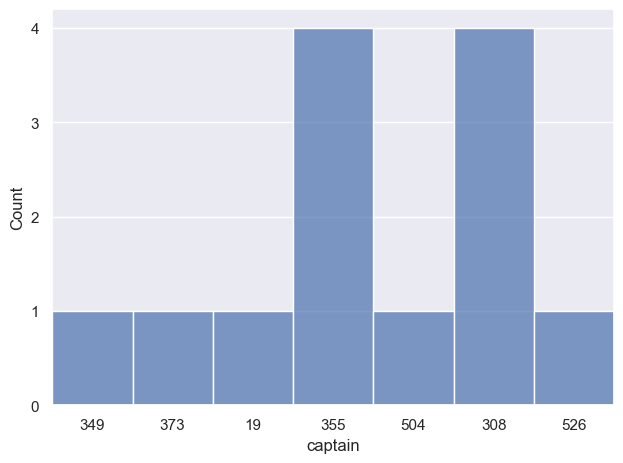

In [343]:
import seaborn.objects as so

captain_bar_chart = (
    so.Plot(all_df, x="captain")
    .add(so.Bars(), so.Count())
    .scale(y=so.Continuous().tick(every=1))
    .label(y="Count")
)

captain_bar_chart.show()


# list of league participants
# Fpl wrap for my community

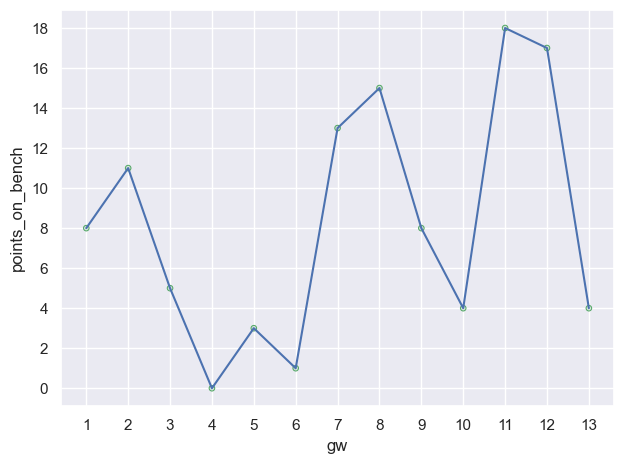

In [346]:
points_on_bench = (
    so.Plot(all_df, y="points_on_bench", x="gw")
    .add(so.Lines())
    .add(so.Dots(color="C2"))
    .scale(y=so.Continuous().tick(every=2), x=so.Continuous().tick(every=1))
)

points_on_bench.show()
points_on_bench.save(PATH)

In [46]:
frequency_counter(grand_dict, key="players")
# started for the longest amount of time
# started for only one week

# delivered me the most points in that run - avg
# delivered me the least points in that - avg

# may be worth showing the span of gameweek the players were present

{'players': [('343', 13),
  ('36', 11),
  ('19', 10),
  ('524', 10),
  ('504', 10),
  ('355', 9),
  ('430', 7),
  ('308', 7),
  ('516', 7),
  ('131', 6),
  ('14', 6),
  ('373', 5),
  ('353', 4),
  ('29', 4),
  ('412', 4),
  ('234', 4),
  ('60', 4),
  ('103', 3),
  ('519', 3),
  ('664', 3),
  ('17', 2),
  ('398', 2),
  ('226', 2),
  ('33', 2),
  ('526', 2),
  ('349', 1),
  ('599', 1),
  ('28', 1),
  ('311', 1)]}

In [76]:
r = requests.get(history_url.format(PLAYER_ID))
r = r.json()

dict_keys(['event', 'points', 'total_points', 'rank', 'rank_sort', 'overall_rank', 'bank', 'value', 'event_transfers', 'event_transfers_cost', 'points_on_bench'])

In [47]:
frequency_counter(grand_dict, key="bench")

{'bench': [('343', 13)]}

In [143]:
history = r["current"]

history = pd.DataFrame(history)
history["value"] = history["value"] / 10
history["bank"] = history["bank"] / 10

history.rename(columns={"event": "gameweek"}, inplace=True)
history.set_index("gameweek", inplace=True)

history

,points,total_points,rank,rank_sort,overall_rank,bank,value,event_transfers,event_transfers_cost,points_on_bench
gameweek,,,,,,,,,,
1,51,51,6785752,6786196,6785753,0.0,100.0,0,0,8
2,58,109,1124022,1124973,4092407,2.9,100.1,1,0,11
3,71,180,127698,127923,860814,1.7,100.4,1,0,5
4,89,269,713860,714351,254874,2.5,100.8,1,0,0
5,37,306,7752344,7753788,595052,2.5,101.2,0,0,3
6,64,370,6191151,6191788,1279643,3.8,101.5,2,0,1
7,61,431,1897844,1898410,801109,0.2,101.5,0,0,13
8,62,493,791512,792001,338243,0.4,101.9,1,0,15
9,81,574,2138192,2139608,341423,0.4,102.6,0,0,8


In [265]:
for i in history.columns:
    print(history[i].dtypes)

int64
int64
int64
int64
int64
float64
float64
int64
int64
int64


In [292]:
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

max_points_df = history[history["points"] == history.max(axis=0)["points"]]
min_points_df = history[history["points"] == history.min(axis=0)["points"]]

max_overall_rank = history[history["overall_rank"] == history.max(axis=0)["overall_rank"]]
min_overall_rank = history[history["overall_rank"] == history.max(axis=0)["overall_rank"]]


f = plt.figure(figsize=(13, 7), dpi=300, layout="constrained")
g = plt.figure(figsize=(13, 7), dpi=300, layout="constrained")
h = plt.figure(figsize=(13, 7), dpi=300, layout="constrained")

# fig,ax = plt.subplots(3, 1, figsize= (13, 12), dpi=300)
line_plot = (
    so.Plot(history, x="gameweek", y="points")
    .add(so.Lines(color="C1"))
    .add(so.Dots(color="C2"), so.Agg("min"))
    .add(so.Dots(color="C2"), so.Agg("max"))
    .scale(x=so.Continuous().tick(every=1), color=so.Continuous().tick(at=history.index))
)

money_in_bank_plot = (
    so.Plot(history, x="gameweek", y="bank")
    .add(so.Lines(color="C1"))
    .scale(x=so.Continuous().tick(every=1), color=so.Continuous().tick(at=history.index))
)

rank_plot = (
    so.Plot(history, x="gameweek", y="overall_rank")
    .add(so.Lines(color="C1"))
    .scale(
        x=so.Continuous().tick(every=1),
        y=so.Continuous().label(like="{x:,}"),
        color=so.Continuous().tick(at=history.index),
    )
    .limit(y=(2_000_000, 0))
    .label(
        title="Overall rank versus gameweek",
    )
)

# compare against id of world number one? or other opposition
# compare against average
# sns.lineplot(aggregate_history_metric(metric= 'rank'))

<Figure size 3900x2100 with 0 Axes>

<Figure size 3900x2100 with 0 Axes>

<Figure size 3900x2100 with 0 Axes>

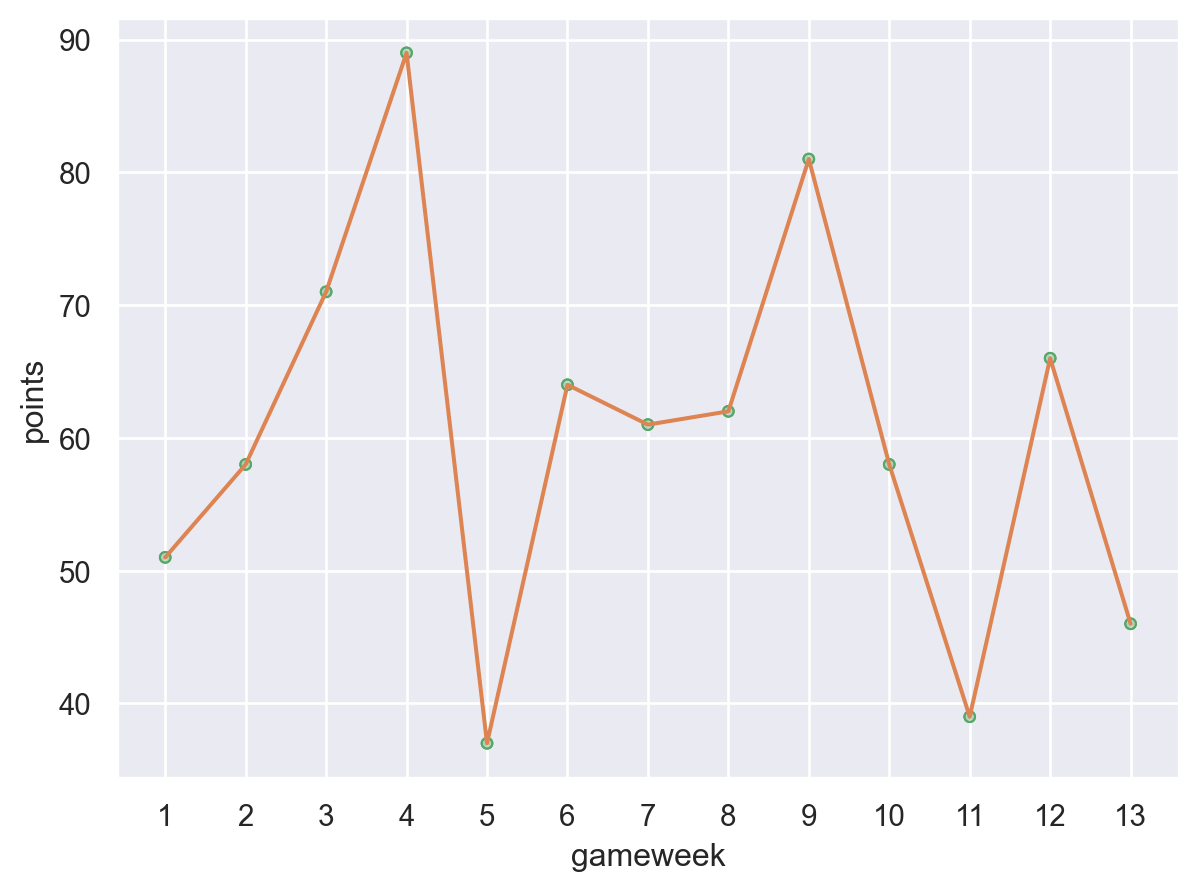

In [293]:
line_plot

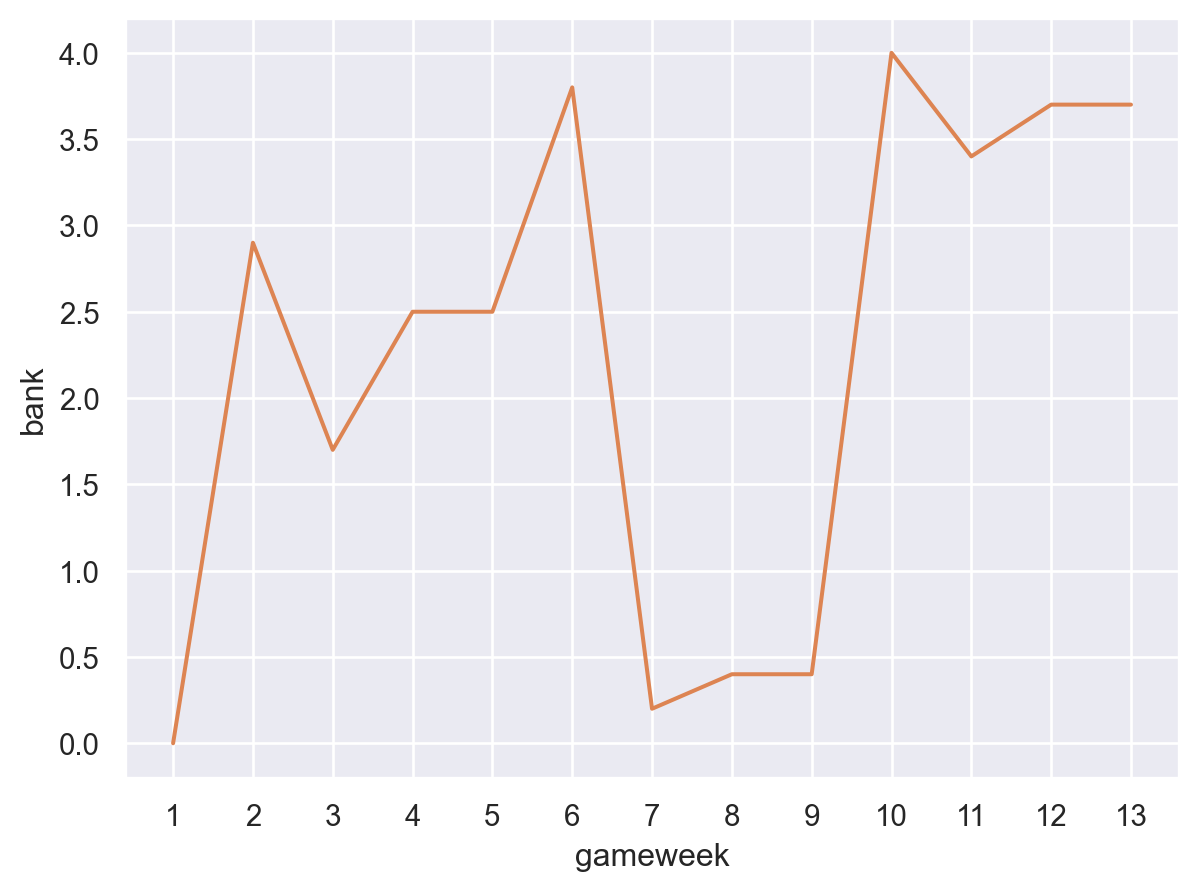

In [255]:
money_in_bank_plot

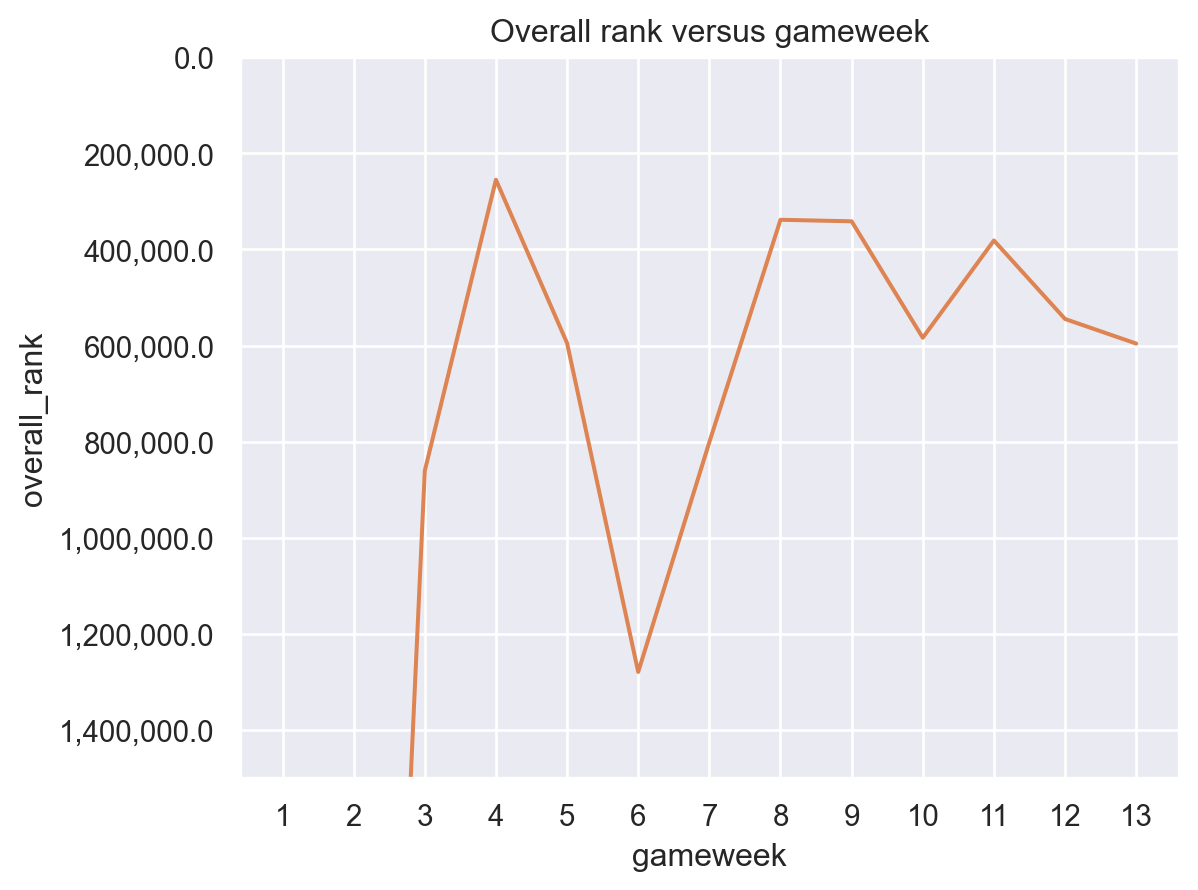

In [289]:
# rank_plot

In [ ]:
# plot of ranks increase
# players you keep selling and buying
# loyal players
# players you're ignoring for captainship

# trends in transfers
# trends in captainship
# trends in points on the bench

# trend in highest scoring player/differentials owned